## 1. AlexNet Implmentation

### We start by Importing the needed libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout , Flatten , Conv2D , MaxPooling2D ,BatchNormalization
import tensorflow as tf
#from tensorflow.keras.layers import BatchNormalization
#tf.keras.layers.BatchNormalization()
#from keras.layers import Dense
import numpy as np
from keras.engine import input_layer

'''
we randomly split a dataset into training and testing sets,
setting the random seed ensures that the same split is used every time the experiment is run.
This can be useful for comparing the performance of different algorithms or hyperparameters. 
'''
np.random.seed(1000)

## 2. making the architecture of the neural network stated in the paper

### The architecture components are as follows :

5 convolution layers and the 3 fully connected layers and then the output layer



In [29]:

#instantiantion
AlexNet = Sequential()

# 1st Convolution layer
AlexNet.add(Conv2D( filters=96, input_shape=(32,32,3) , kernel_size=(11,11) , strides=(4,4) , padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
AlexNet.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2) , padding="same"))

# 2nd coonvolution layer
AlexNet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))

#3rd convolution layer
AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))

# 4th convolution layer
AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))

#5th convolution layer
AlexNet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="same"))


#passing it to fully connected layer 

AlexNet.add(Flatten())

#1st Fully connected layer

AlexNet.add(Dense(4096,input_shape=(32,32,3)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
#adding dropout to reduce over fitting
AlexNet.add(Dropout(0.4))


#2nd fully connected layer

AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
#adding dropout to reduce over fitting
AlexNet.add(Dropout(0.4))


#3rd fully connected layer

AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("relu"))
#dropout
AlexNet.add(Dropout(0.4))

#output layer

AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation("softmax"))

AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization_9 (Batc  (None, 8, 8, 96)         384       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_10 (Bat  (None, 4, 4, 256)       

## 3. Compiling 
In Keras, the compile() method is used to configure the learning process of a model. This method takes three important parameters: optimizer, loss function, and metrics.

Optimizer: The optimizer is used to update the weights of the model during training. Some common optimizers in Keras include Stochastic Gradient Descent (SGD), Adam, RMSprop, and Adagrad.

Loss function: The loss function is used to compute the error between the predicted output and the actual output. The goal of the optimizer is to minimize this error. Common loss functions in Keras include mean squared error (MSE), categorical cross-entropy, and binary cross-entropy.

Metrics: Metrics are used to evaluate the performance of the model. These are typically different from the loss function, as they provide additional information about the model's performance, such as accuracy or precision.

In [3]:
# compiling the model
AlexNet.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

## 4. Now let's import the Data to apply our AlexNet architecture 

In [4]:
from keras.datasets import cifar10
(x_train , y_train) , (x_test , y_test)  = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## 5. Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3)

#Dimensions of the cifar 10
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

'''
After showing the shape of the y output values we find that
the y values should be categorical values as we are trying to categorize
the output of 10 classes which are cifar 10 data
'''

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


'\nAfter showing the shape of the y output values we find that\nthe y values should be categorical values as we are trying to categorize\nthe output of 10 classes which are cifar 10 data\n'

## 6. Onehot Encoding

In [6]:
from sklearn.utils.multiclass import unique_labels
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

'''
Now we have fixed the y output issue as now it's 10 classes 
'''

(35000, 32, 32, 3) (35000, 10)
(15000, 32, 32, 3) (15000, 10)
(10000, 32, 32, 3) (10000, 10)


"\nNow we have fixed the y output issue as now it's 10 classes \n"

## 7. Now it's time for Data Augmentation

data augmentation is used to increase data to aviod overfiting


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator (rotation_range=2,horizontal_flip=True,zoom_range=0.1)
val_generator = ImageDataGenerator (rotation_range=2,horizontal_flip=True,zoom_range=0.1)
test_generator = ImageDataGenerator (rotation_range=2,horizontal_flip=True,zoom_range=0.1)

'''
fitting the data below
'''

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

## 8. Learning rate

in the learning rate we will use dynamic learning rate in which we will wait 3 epochs if there's no improvement the learning rate will change by a given value




In [8]:
'''
ReduceLROnPlateau is a callback function in Keras,
a popular deep learning library for Python,
that is used to reduce the learning rate of the optimizer when a metric has stopped improving.
The purpose of this function is to help the model converge more quickly and accurately by gradually reducing
the step size of the optimizer during training.
'''

from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau ( monitor='val_acc' , factor=0.1 , patience=3 , min_lr=1e-5 )

'''
1- monitor: The metric to monitor for improvement. In this case, val_acc is being monitored, which refers to the validation accuracy.

2- factor: The factor by which to reduce the learning rate when the metric stops improving. In this case, the learning rate will be reduced by a factor of 0.1.

3- patience: The number of epochs with no improvement after which the learning rate will be reduced. In this case, if the validation accuracy does not improve for 3 epochs, the learning rate will be reduced.

4- min_lr: The minimum learning rate allowed. In this case, the learning rate will not be allowed to go below 1e-5.
'''

'\n1- monitor: The metric to monitor for improvement. In this case, val_acc is being monitored, which refers to the validation accuracy.\n\n2- factor: The factor by which to reduce the learning rate when the metric stops improving. In this case, the learning rate will be reduced by a factor of 0.1.\n\n3- patience: The number of epochs with no improvement after which the learning rate will be reduced. In this case, if the validation accuracy does not improve for 3 epochs, the learning rate will be reduced.\n\n4- min_lr: The minimum learning rate allowed. In this case, the learning rate will not be allowed to go below 1e-5.\n'

## 9. Defining the parameters


In [9]:
# parameters
batch_size = 100
epochs = 5
learn_rate = 0.001


## Training the Model

In [10]:
AlexNet.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]/batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      validation_steps = 250,
                      callbacks = [lrr],
                      verbose=1)

Epoch 1/5
350/350 [==============================] - ETA: 0s - loss: 1.6463 - accuracy: 0.4105

350/350 [==============================] - 47s 77ms/step - loss: 1.6463 - accuracy: 0.4105 - val_loss: 2.3598 - val_accuracy: 0.2259 - lr: 0.0010
Epoch 2/5
350/350 [==============================] - ETA: 0s - loss: 1.3989 - accuracy: 0.5119

350/350 [==============================] - 19s 54ms/step - loss: 1.3989 - accuracy: 0.5119 - lr: 0.0010
Epoch 3/5
349/350 [============================>.] - ETA: 0s - loss: 1.2864 - accuracy: 0.5530

350/350 [==============================] - 19s 56ms/step - loss: 1.2859 - accuracy: 0.5532 - lr: 0.0010
Epoch 4/5
350/350 [==============================] - ETA: 0s - loss: 1.1980 - accuracy: 0.5837

350/350 [==============================] - 20s 57ms/step - loss: 1.1980 - accuracy: 0.5837 - lr: 0.0010
Epoch 5/5
350/350 [==============================] - ETA: 0s - loss: 1.1216 - accuracy: 0.6144

350/350 [==============================] - 19s 54ms/step - loss: 1.1216 - accuracy: 0.6144 - lr: 0.0010


## Define a Function for Confusion Matrix


In [17]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix (
                            y_true,
                            y_pred,
                            classes,
                            normalize=False,
                            title=None,
                            cmap=plt.cm.Blues):

  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix without normalization'

  #compute confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')
  
#print confusion matrix

  fig , ax = plt.subplots(figsize=(7,7))
  im = ax.imshow(cm, interpolation='nearest',cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  # we want to show all the ticks
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         xticklabels=classes,
         yticklabels=classes,
         title=title,
         ylabel = 'True Label',
         xlabel = 'Predicted Label'
         )
  

  plt.setp(ax.get_xticklabels(),rotation = 45,ha='right',rotation_mode='anchor')

  # loop over data dimesions and create text annotations

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j,i,format(cm[i,j],fmt),
              ha="center",
              va = "center",
              color="white" if cm[i,j] >  thresh else "black")
  
  fig.tight_layout()
  return ax

np.set_printoptions(precision=2)

## Making predictions 


In [26]:
# Making predictions 

y_pred = np.argmax(AlexNet.predict(x_test), axis=-1)
y_true = np.argmax(y_test,axis=1)

# plotting the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true,y_pred)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 3ms/step


## plotting Non-Normalized confusion matrix


Confusion matrix without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted Label', ylabel='True Label'>

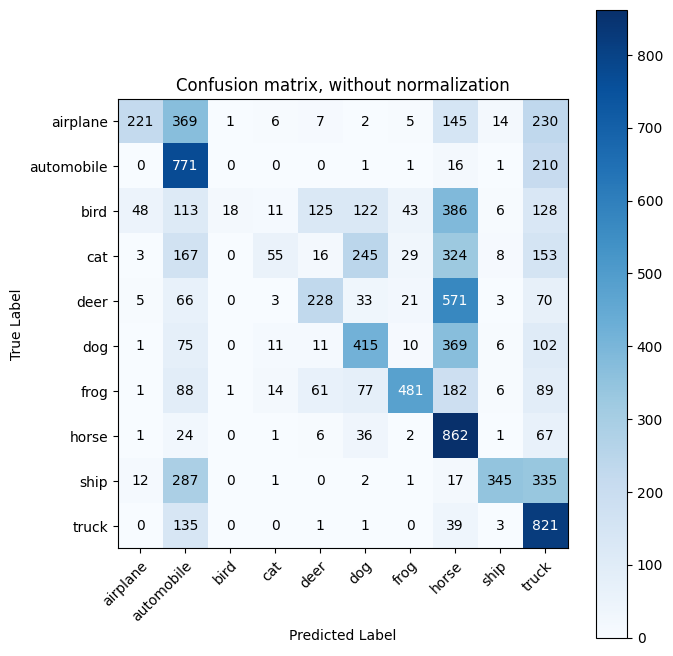

In [25]:
# plotting non-normalized confusion matrix

plot_confusion_matrix(y_true,y_pred,classes=class_names,title='Confusion matrix, without normalization')

## plotting Normalized confusion matrix


normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted Label', ylabel='True Label'>

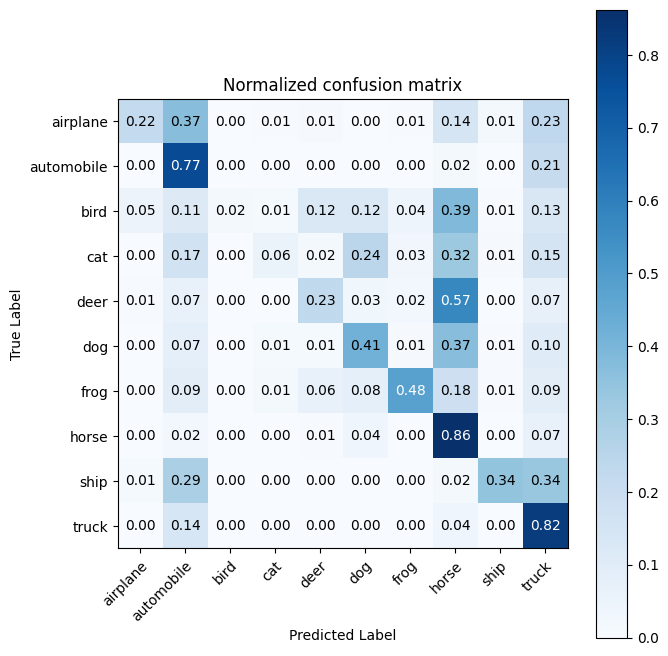

In [24]:
# Normalized Plot

plot_confusion_matrix(y_true,y_pred,classes=class_names,
                      normalize=True,
                      title='Normalized confusion matrix')

# Prediction Accurracy

In [28]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_true,y_pred)
print('Accuracy score is : ', acc_score)

Accuracy score is :  0.4217


In [30]:
pip freeze requirements.txt 

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==20